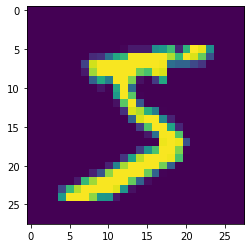

In [1]:
#@markdown 載入MNIST資料
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _ ), (x_test, _ ) = mnist.load_data()
plt.imshow(x_train[0])

In [2]:
#@markdown 資料前處理
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
#@markdown 建立模型
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
# Input : 784 -> Hidden: 32 -> Output:784

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
#@markdown 模型訓練
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
epoch_num = 5 #@param {type:"integer"}
autoencoder.fit(x_train, x_train,
                epochs=5, 
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 8ms/step - loss: 0.2752 - val_loss: 0.1878
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1683 - val_loss: 0.1514
Epoch 3/5
235/235 [==============================] - 2s 9ms/step - loss: 0.1423 - val_loss: 0.1326
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1275 - val_loss: 0.1202
Epoch 5/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1173 - val_loss: 0.1117


In [5]:
#@markdown 用 Encoder 編碼資料
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
print('Encoded DIM')
print(encoded_imgs.shape)

print('Latent Space')
print(encoded_imgs)

Encoded DIM
(10000, 32)
Latent Space
[[ 0.8934294   6.0563774   6.320306   ...  0.          4.1146936
   0.        ]
 [ 3.6232228   0.          0.8345348  ...  0.33812153  0.94854176
   8.375474  ]
 [ 2.3738909   2.7190158   3.1275165  ...  3.9966576   3.0679765
  10.639654  ]
 ...
 [ 8.015554   11.365533    3.8028724  ...  8.649272    5.830124
   1.8988221 ]
 [ 3.9036915   7.820105    0.9788401  ...  5.332766    5.593743
   7.069437  ]
 [10.235194    1.9870279   6.7421126  ... 11.620244   13.845741
   5.1899605 ]]


In [6]:
#@markdown 用Decoder 還原資料
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoded_imgs = decoder.predict(encoded_imgs)
print('Decoded DIM')
print(decoded_imgs.shape)

Decoded DIM
(10000, 784)


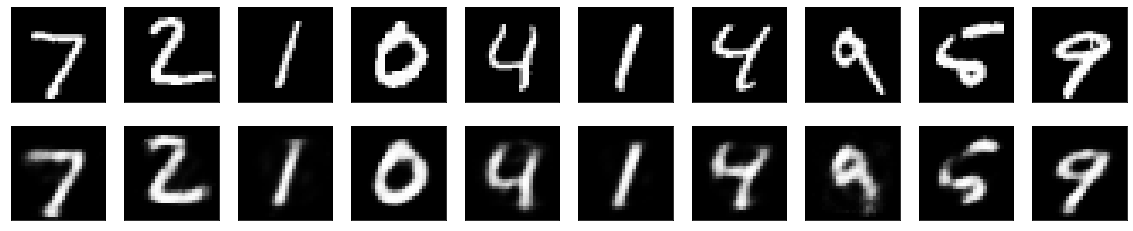

In [7]:
#@markdown 顯現還原結果

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()